In [1]:
import numpy as np
import scipy.io as scio
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

In [2]:
# BA = nx.random_graphs.barabasi_albert_graph(2000, 3)
# BA_2000_3 = nx.to_numpy_matrix(BA)
# network_physical = BA_2000_3
# network_scale_1 = network_physical.shape

In [3]:
# np.sum(np.sum(network_physical, axis=0)==0)

In [2]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [3]:
# 网络数据导入为numpy数组
dataFile_1 = '../../Matlab/data/BA_2000_3.mat'
data_1 = scio.loadmat(dataFile_1)
network_scale_1 = data_1['A'].shape
network_physical = np.array(data_1['A'])

assert check_symmetric(network_physical), "network doesn\'t symmetry!"
np.sum(np.sum(network_physical, axis=0)==0)

0

In [6]:
# 参数设置

# 公共参数
time_steps = 50    # 总的时间步数
N = network_scale_1[0]    # 网络节点数
p = random.randint(0, N-1)    # 初始始随机选出一个感染节点，四舍五入

# SIR参数
bata = 0.3    # 感染概率
mu = 0.5    # 免疫概率

Nodes_SIS = np.zeros([time_steps, N])    # N行代表时间步数，T列代表节点数，记录每步所有节点的状态

infective_count = np.zeros([time_steps])    # 每步感染节点数,用于最终统计
immune_count = np.zeros([time_steps])    # 每步免疫节点数,用于最终统计
s_count = np.zeros([time_steps])    # 每步免疫节点数,用于最终统计

Nodes_SIS[0, p] = 1    # 第一步标出初始感染节点的位置

In [7]:
for t in range(time_steps-1):
    
    # SIS演化
    for i in range(N):

        if Nodes_SIS[t, i] == 0:    # 0代表易感(S)，如果上一步节点i健康，就看他的邻居有没有被感染的

            neighbor_total = np.where((network_physical[i, :] == 1))[0]    # 查找其邻居
            infective_nodes = np.where((Nodes_SIS[t, :] == 1))[0]
            neighbor_infective = np.intersect1d(infective_nodes, neighbor_total)    # 取交集，真正可以感染它的邻居
            Num_neighbor_infective = len(neighbor_infective)    # 统计

            # SIS感染率改变规则
            rate_temp = (1 - bata) ** Num_neighbor_infective

            # SIS感染过程
            v1 = 1 - rate_temp    # 这是最终计算的感染率
            x1 = np.random.rand(1)
            if x1 <= v1:
                Nodes_SIS[t+1, i] = 1

        # SIS康复过程
        elif Nodes_SIS[t, i] == 1:

            recover_rate_current = mu
            x3 = np.random.rand(1) 
            if x3 <= recover_rate_current:
                Nodes_SIS[t+1, i] = 0
            else:
                Nodes_SIS[t+1, i] = 1

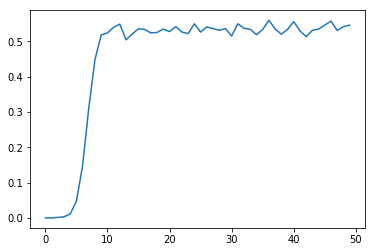

In [8]:
# 处理数据
infective_count = np.sum(Nodes_SIS, axis=1)/N

plt.plot(infective_count, label='SIS')

In [4]:
# 参数设置

# 公共参数
Monte_Carlo_loop = 20    # 蒙特卡洛模拟次数
time_steps = 50    # 总的时间步数
N = network_scale_1[0]    # 网络节点数
p = random.randint(0, N-1)    # 初始始随机选出一个感染节点，四舍五入

# SIS参数
bata = 0.2    # 感染概率
mu = 0.1    # 恢复概率

Nodes_SIS = np.zeros([Monte_Carlo_loop, time_steps, N])    # N行代表时间步数，T列代表节点数，记录每步所有节点的状态

infective_count = np.zeros([Monte_Carlo_loop, time_steps])    # 每步感染节点数,用于最终统计
infective_count_average = np.zeros([1, time_steps])

In [5]:
time_start = time.time()

for loop in range(Monte_Carlo_loop):
    
    Nodes_SIS[loop, 0, p] = 1    # 第一步标出初始感染节点的位置

    for t in range(time_steps-1):

        # SIS演化
        for i in range(N):

            if Nodes_SIS[loop, t, i] == 0:    # 0代表易感(S)，如果上一步节点i健康，就看他的邻居有没有被感染的

                neighbor_total = np.where((network_physical[i, :] == 1))[0]    # 查找其邻居
                infective_nodes = np.where((Nodes_SIS[loop, t, :] == 1))[0]
                neighbor_infective = np.intersect1d(infective_nodes, neighbor_total)    # 取交集，真正可以感染它的邻居
                Num_neighbor_infective = len(neighbor_infective)    # 统计

                infect_rate_current = bata    # 当前临时感染率
                rate_temp = 1    # 用于计算感染率

                # SIS感染率改变规则
                rate_temp = (1 - bata) ** Num_neighbor_infective

                # SIS感染过程
                v1 = 1 - rate_temp    # 这是最终计算的感染率
                x1 = np.random.rand(1)
                if x1 <= v1:
                    Nodes_SIS[loop, t+1, i] = 1

            # SIS康复过程
            elif Nodes_SIS[loop, t, i] == 1:

                recover_rate_current = mu
                x3 = np.random.rand(1) 
                if x3 <= recover_rate_current:
                    Nodes_SIS[loop, t+1, i] = 0
                else:
                    Nodes_SIS[loop, t+1, i] = 1

    print("loop {} - time has passed: {} ".format(loop, time.time()-time_start))

loop 0 - time has passed: 1.378312110900879 
loop 1 - time has passed: 2.748311996459961 
loop 2 - time has passed: 4.060802936553955 
loop 3 - time has passed: 5.467041730880737 
loop 4 - time has passed: 6.796484708786011 
loop 5 - time has passed: 8.251587390899658 
loop 6 - time has passed: 10.706030130386353 
loop 7 - time has passed: 12.096744060516357 
loop 8 - time has passed: 13.498956441879272 
loop 9 - time has passed: 14.837375164031982 
loop 10 - time has passed: 16.170808792114258 
loop 11 - time has passed: 17.482301235198975 
loop 12 - time has passed: 18.928436517715454 
loop 13 - time has passed: 20.343692541122437 
loop 14 - time has passed: 21.664116859436035 
loop 15 - time has passed: 23.070356607437134 
loop 16 - time has passed: 24.544414281845093 
loop 17 - time has passed: 26.905099153518677 
loop 18 - time has passed: 28.35322618484497 
loop 19 - time has passed: 29.658773183822632 
loop 20 - time has passed: 31.06597089767456 
loop 21 - time has passed: 32.5

In [6]:
# 处理数据
for i in range(Monte_Carlo_loop):
    infective_count[i,:] = np.sum(Nodes_SIS[i,:,:], axis=1)
    
infective_count_average = np.mean(infective_count, axis=0)

assert infective_count_average.shape == (time_steps,), "infective_count_average\' size don\'t match!"

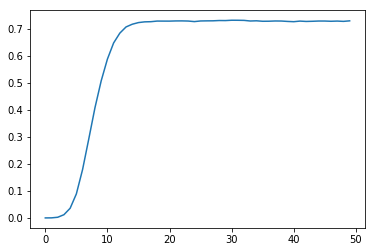

In [8]:
plt.plot(infective_count_average/N, label='SIS')